## Clustering is a type of unsupervised learning technique in machine learning that involves grouping similar objects into one or more clusters. The goal of clustering is to make the objects in the same cluster as similar as possible, while making the objects in different clusters as different as possible.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the customer and transaction data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
data = pd.merge(customers, transactions, on='CustomerID')

In [4]:
# Feature engineering: Summarize transaction data for each customer
customer_features = data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    num_purchases=('TransactionID', 'count'),
    avg_purchase_value=('Price', 'mean')
).reset_index()

In [6]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['total_spend', 'num_purchases', 'avg_purchase_value']])


### K-Means divides the dataset into K clusters. The algorithm assigns each data point to the cluster with the nearest centroid. It then recalculates the centroids based on the new assignments, and the process repeats until the centroids stop changing or a set number of iterations is reached

In [9]:
# Try KMeans with different numbers of clusters (between 2 and 10)
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
db_index_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
    db_index_scores.append(db_index)

In [10]:
# Find the best K based on DB Index (lower is better)
best_k = k_range[np.argmin(db_index_scores)]
print(f"Optimal number of clusters (based on DB Index): {best_k}")

# Fit KMeans with the best K value
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(scaled_features)


Optimal number of clusters (based on DB Index): 6


KMeans(n_clusters=6, random_state=42)

In [11]:
# Add cluster labels to the customer data
customer_features['Cluster'] = kmeans.labels_

#### This index is used to evaluate the quality of the clusters formed by K-Means. The lower the DB Index, the better the clustering quality.

In [12]:
# Calculate Davies-Bouldin index for the optimal clustering
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)
print(f"DB Index for the optimal clustering: {db_index}")


DB Index for the optimal clustering: 0.8759642420937288


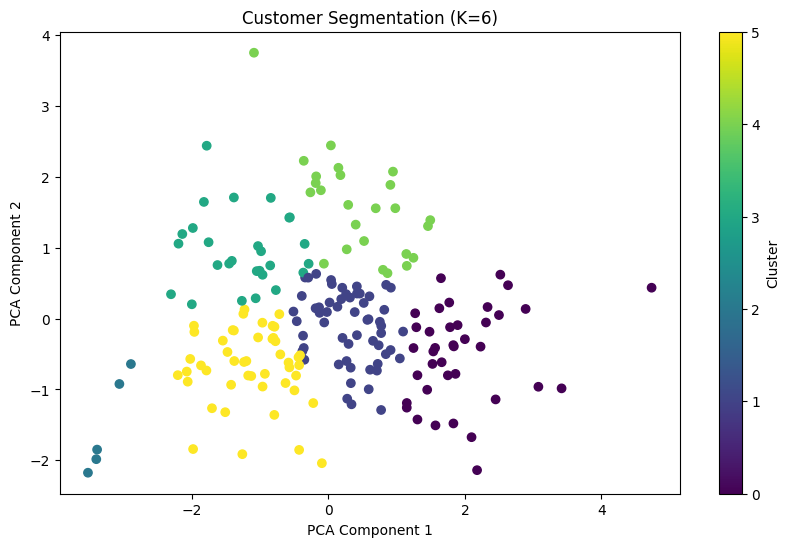

In [13]:
# Visualize the clusters using PCA (2D plot)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f"Customer Segmentation (K={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [14]:
# Save the final clusters to a CSV file
customer_features.to_csv('Customer_Segmentation.csv', index=False)

In [18]:
import pandas as pd

# Read the CSV file
customer_segmentation = pd.read_csv('Customer_Segmentation.csv')


In [19]:
customer_segmentation


,CustomerID,total_spend,num_purchases,avg_purchase_value,Cluster
0,C0001,3354.52,5,278.334000,1
1,C0002,1862.74,4,208.920000,5
2,C0003,2725.38,4,195.707500,5
3,C0004,5354.88,8,240.636250,0
4,C0005,2034.24,3,291.603333,3
...,...,...,...,...,...
194,C0196,4982.88,4,416.992500,4
195,C0197,1928.65,3,227.056667,5
196,C0198,931.83,2,239.705000,3
197,C0199,1979.28,4,250.610000,5


In [21]:

customer_segmentation_sorted = customer_segmentation.sort_values(by='Cluster', ascending=True)

# Save the sorted DataFrame back to a CSV 
customer_segmentation_sorted.to_csv('Customer_Segmentation_Sorted.csv', index=False)


In [24]:

print(customer_segmentation_sorted)


    CustomerID  total_spend  num_purchases  avg_purchase_value  Cluster
64       C0065      7663.70             10          275.800000        0
161      C0162      4802.24              8          255.948750        0
121      C0122      5072.55              7          293.212857        0
101      C0102      6132.36              8          296.155000        0
155      C0156      7634.45             11          289.058182        0
..         ...          ...            ...                 ...      ...
70       C0071      1400.83              3          183.250000        5
133      C0134      2679.28              5          166.128000        5
141      C0142      2239.04              4          192.932500        5
90       C0091      3137.66              6          143.541667        5
48       C0049      2315.48              8          158.511250        5

[199 rows x 5 columns]


In [25]:
cluster_0_data = customer_segmentation[customer_segmentation['Cluster'] == 0]

# Display the filtered DataFrame
print(cluster_0_data)

    CustomerID  total_spend  num_purchases  avg_purchase_value  Cluster
3        C0004      5354.88              8          240.636250        0
7        C0008      4271.61             10          231.160000        0
11       C0012      5231.26              7          270.798571        0
12       C0013      6000.56              7          320.790000        0
16       C0017      4753.82              8          225.785000        0
20       C0021      5419.92              8          308.576250        0
27       C0028      6819.57              8          288.611250        0
40       C0041      6149.78              7          254.282857        0
44       C0045      6021.80              7          267.732857        0
45       C0046      5627.83              7          288.811429        0
50       C0051      5699.57              7          314.345714        0
53       C0054      8040.39              8          330.488750        0
58       C0059      7073.28              8          355.463750  

In [26]:
cluster_0_data = customer_segmentation[customer_segmentation['Cluster'] == 4]

# Display the filtered DataFrame
print(cluster_0_data)

    CustomerID  total_spend  num_purchases  avg_purchase_value  Cluster
5        C0006      4227.57              4          332.035000        4
15       C0016      3874.42              5          391.350000        4
22       C0023      5158.65              6          394.536667        4
25       C0026      3549.05              4          315.910000        4
39       C0040      3969.40              3          397.340000        4
41       C0042      2402.49              3          411.630000        4
43       C0044      3230.11              3          429.003333        4
47       C0048      3850.94              5          355.778000        4
49       C0050      3068.83              3          395.273333        4
65       C0066      3799.28              3          405.166667        4
73       C0074      3055.22              3          377.910000        4
77       C0078       995.52              1          497.760000        4
78       C0079      4251.56              4          358.867500  